In [118]:
import ROOT
import ctypes

In [119]:


sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_sig_ext_1ab_sigbkg/topo/resultfile/result_phi/standard.root")
signal_1ab_tree = sig_1ab_file.Get("phi")


In [120]:
# D0_M_TH1F = ROOT.TH1F("D0_M_TH1F","D0 mass",50,1.67,2.06)
# D0_M_TH1F = ROOT.TH1F("D0_M_TH1F","D0 mass",50,1.72,1.92)
D0_M_TH1F_2 = ROOT.TH1F("D0_M_TH1F_2","D0 mass",50,1.67, 2.06)
# D0_M_TH1F_2 = ROOT.TH1F("D0_M_TH1F_2","D0 mass",50,1.67, 1.9)


In [121]:
def extract_histo(tree, histogram):
    for event in tree:
        histogram.Fill(event.D0_M)
    return histogram

In [122]:
def apply_cuts(tree, histogram):
    for event in tree:
        if event.D0_M > 1.67 and event.D0_M < 2.06:
        # if event.D0_M > 1.78 and event.D0_M < 1.92:

            histogram.Fill(event.D0_M)
    return histogram

In [123]:
def extract_signals(tree, histogram):
    for event in tree:
        if event.D0_M > 1.67 and event.D0_M < 2.06:
        # if event.iCascDcyBrP_Dst_0 !=1 and event.D0_M > 1.67 and event.D0_M < 2.06:
        # if event.iCascDcyBrP_Dst_0 ==0 and event.D0_M > 1.67 and event.D0_M < 1.9 and event.Belle2Pi0Veto_75MeV > 0.02:

            histogram.Fill(event.D0_M)
    return histogram

In [124]:

# D0_M_TH1F = apply_cuts(signal_tree, D0_M_TH1F)
# c1 = ROOT.TCanvas()
# D0_M_TH1F.Draw()
# c1.Draw()

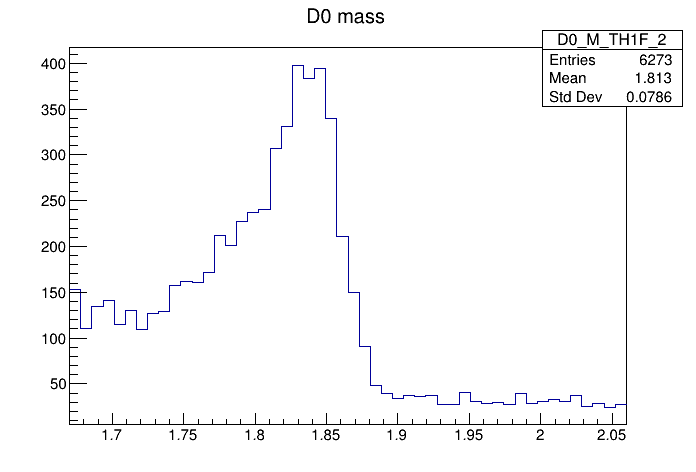

In [125]:

D0_M_TH1F_2 = extract_signals(signal_1ab_tree, D0_M_TH1F_2)
# D0_M_TH1F_2 = apply_cuts(signal_1ab_tree, D0_M_TH1F_2)

c1 = ROOT.TCanvas()
D0_M_TH1F_2.Draw()
c1.Draw()

In [126]:
N_entry = D0_M_TH1F_2.GetEntries()

In [127]:

# scale_factor = D0_M_TH1F_2.GetEntries()/D0_M_TH1F.GetEntries()

In [128]:
# scale_factor

In [129]:
fitting_region = (1.67, 2.06)
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
# x.setBins(50)
l = ROOT.RooArgList(x)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, scale_factor)
signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F_2, 1)


In [130]:

mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.84,1.83, 1.86)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.03,0,0.5)
alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,2)
n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 5,0,10)
 
mean_sig = ROOT.RooRealVar("mean_sig", "mean of gaussians", 1.867,1.85, 1.87)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.02,0,0.5)
alpha2 = ROOT.RooRealVar("alpha2", "width of gaussians", 0.5,0,2)
n_CB2 = ROOT.RooRealVar("n_CB2", "width of gaussians", 5,0,10)

    
# Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.67,1.93)    
# Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
# Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    


x_bkg2_c0 = ROOT.RooRealVar("x_bkg2_c0", "c0",0.2, -1,1)
x_bkg2_c1 = ROOT.RooRealVar("x_bkg2_c1", "c1",0.2, -1,1)


[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_extended_model_sighist) constructing test statistic for sub-range named fit
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_extended_model_sighist) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (sig_model,Vpi0_model,remain_model)
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (sig_model,Vpi0_model,remain_model)
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (sig_model,Vpi0_model,remain_model)
[#1] INFO:Minimization 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


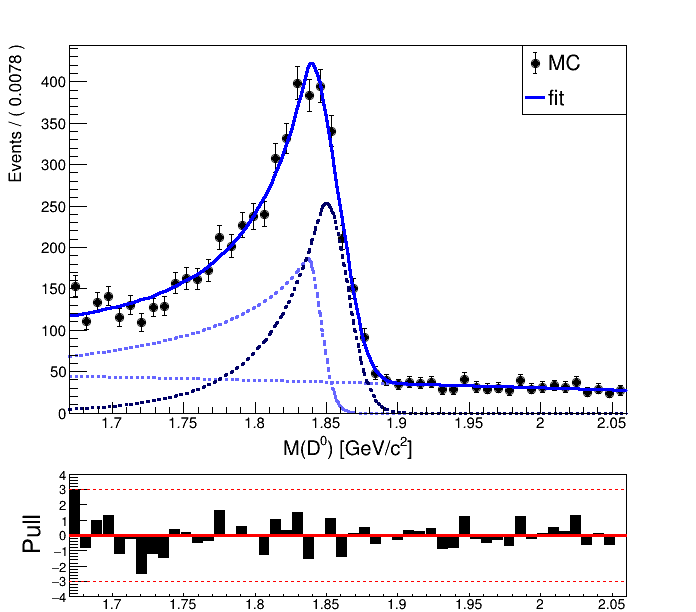

In [135]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))




remain_model = ROOT.RooPolynomial("remain_model", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c0, x_bkg2_c1))

Vpi0_model = ROOT.RooCBShape("Vpi0_model", "Signal component 2", x, mean, sigma1, alpha, n_CB)

sig_model = ROOT.RooCBShape("sig_model", "Signal component 2", x, mean_sig, sigma2, alpha2, n_CB2)




# sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.1, 0.0, 1.0)
# sig1_model = ROOT.RooAddPdf("sig1_model", "model", [remain_model, Vpi0_model], sig1frac)

# sig2frac = ROOT.RooRealVar("sig2frac", "fraction of component 1 in signal", 0.8, 0.0, 1.0)
# model = ROOT.RooAddPdf("model", "model", [sig_model, sig1_model], sig2frac)

####################################
# construct signal + bkg pdf
nsig = ROOT.RooRealVar("nsig","# signal events",300,0,N_entry/2)
nbkg1 = ROOT.RooRealVar("nbkg1","# bkg events",2000,0, N_entry)
nbkg2 = ROOT.RooRealVar("nbkg2","# bkg events",500,0, N_entry)

# nbkg3 = ROOT.RooRealVar("nbkg3","# bkg events",300,0., len(D0_M_np_data))


# extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg1_xy_model,bkg2_xy_model,bkg3_xy_model), ROOT.RooArgSet(nsig, nbkg1, nbkg2, nbkg3))
extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,Vpi0_model,remain_model), ROOT.RooArgSet(nsig, nbkg1, nbkg2))


# model = ROOT.RooAddPdf("model", "model", [sig1, sig2], sig1frac)


# r = model.fitTo(signalhist,NumCPU=12,Range=fitting_region,PrintLevel=-1, Save=1)
r = extended_model.fitTo(signalhist,NumCPU=12,Range=fitting_region,PrintLevel=-1, Save=1)

r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

signalhist.plotOn(frame,Name = "data1", XErrorSize=0)

# model.plotOn(frame, Name="gauss1", Components=remain_model, LineStyle=ROOT.kDashed, LineColor=593)
# model.plotOn(frame, Name="CB1", Components=Vpi0_model, LineStyle=ROOT.kDashed, LineColor=593)
# model.plotOn(frame, Name="CB1", Components=sig_model, LineStyle=ROOT.kDashed, LineColor=593)

extended_model.plotOn(frame, Name="gauss1", Components=remain_model, LineStyle=ROOT.kDashed, LineColor=593)
extended_model.plotOn(frame, Name="CB1", Components=Vpi0_model, LineStyle=ROOT.kDashed, LineColor=593)
extended_model.plotOn(frame, Name="CB1", Components=sig_model, LineStyle=ROOT.kDashed, LineColor=593+10)


# sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

# model.plotOn(frame, Name="fitting",)
# model.plotOn(frame, Name="fitting",)

extended_model.plotOn(frame, Name="fitting",)

# sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
# canv.SaveAs("/media/jykim/T7/saved_plots/fitting/results/phigamma/phi_massveto_1ab_Vpi0.png")

f = ROOT.TFile("phig_signalMC_fitresult.root", "RECREATE")
r.Write("phig_sig")
f.Close()


In [136]:
model.Print("t")

0x55fdea39f400 RooAddPdf::model = 3.6907e-310 [Auto,Dirty] 
  0x55fde89153e0/V- RooRealVar::sig2frac = 0.310576 +/- 0.155551
  0x55fdec722f90/V- RooAddPdf::sig1_model = 3.24894e-310 [Auto,Dirty] 
    0x55fdf028c6e0/V- RooRealVar::sig1frac = 0.470116 +/- 0.139151


In [137]:
f = ROOT.TFile.Open("phig_signalMC_fitresult.root")
r2 = ROOT.gDirectory.Get("phig_sig")
f.Close()


In [138]:
r2.Print()


  RooFitResult: minimized FCN value: -56686, estimated distance to minimum: 0.000142721
                covariance matrix quality: Full matrix, but forced positive-definite
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                 alpha    1.3051e-01 +/-  2.17e-02
                alpha2    4.0421e-01 +/-  2.17e-02
                  mean    1.8368e+00 +/-  8.77e-04
              mean_sig    1.8500e+00 +/-  1.17e-03
                  n_CB    6.5226e-01 +/-  1.13e-01
                 n_CB2    1.0000e+01 +/-  7.62e+00
                 nbkg1    2.4974e+03 +/-  6.80e+01
                 nbkg2    1.8265e+03 +/-  5.76e+01
                  nsig    1.9489e+03 +/-  6.20e+01
                sigma1    9.1491e-03 +/-  9.02e-04
                sigma2    1.4653e-02 +/-  4.76e-04
             x_bkg2_c0    1.0000e+00 +/-  1.93e+00
             x_bkg2_c1   -5.6104e-01 +/-  3.18e-01



In [79]:
r2.correlation("alpha","n_CB")

-0.8506516472603695

In [80]:
r2.edm()

4.7891186550735315e-05

In [51]:
r2.correlationMatrix()

<cppyy.gbl.TMatrixTSym<double> object at 0x562e3e623a10>